In [1]:
#importing Neccesary Libraries
import pandas as pd; pd.set_option('display.max_rows', 1000);
pd.set_option('display.max_columns', 1000); pd.set_option('display.width', 1000)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from statsmodels.stats import diagnostic as diag
from statsmodels.compat import lzip

In [5]:
df=pd.read_csv("car sale price.csv")

In [7]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [9]:
df.shape

(205, 26)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [14]:
df.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [24]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: xlabel='symboling', ylabel='count'>

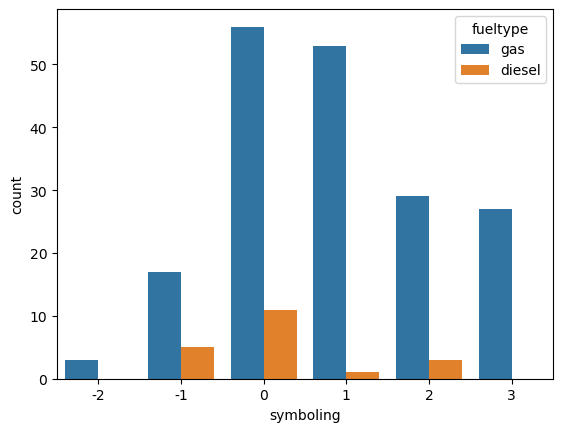

In [27]:
sns.countplot(x=df["symboling"],data=df,hue="fueltype")

In [28]:
significant_features = df.corr().abs()['price'].sort_values(ascending=False)[1:24].index.tolist()

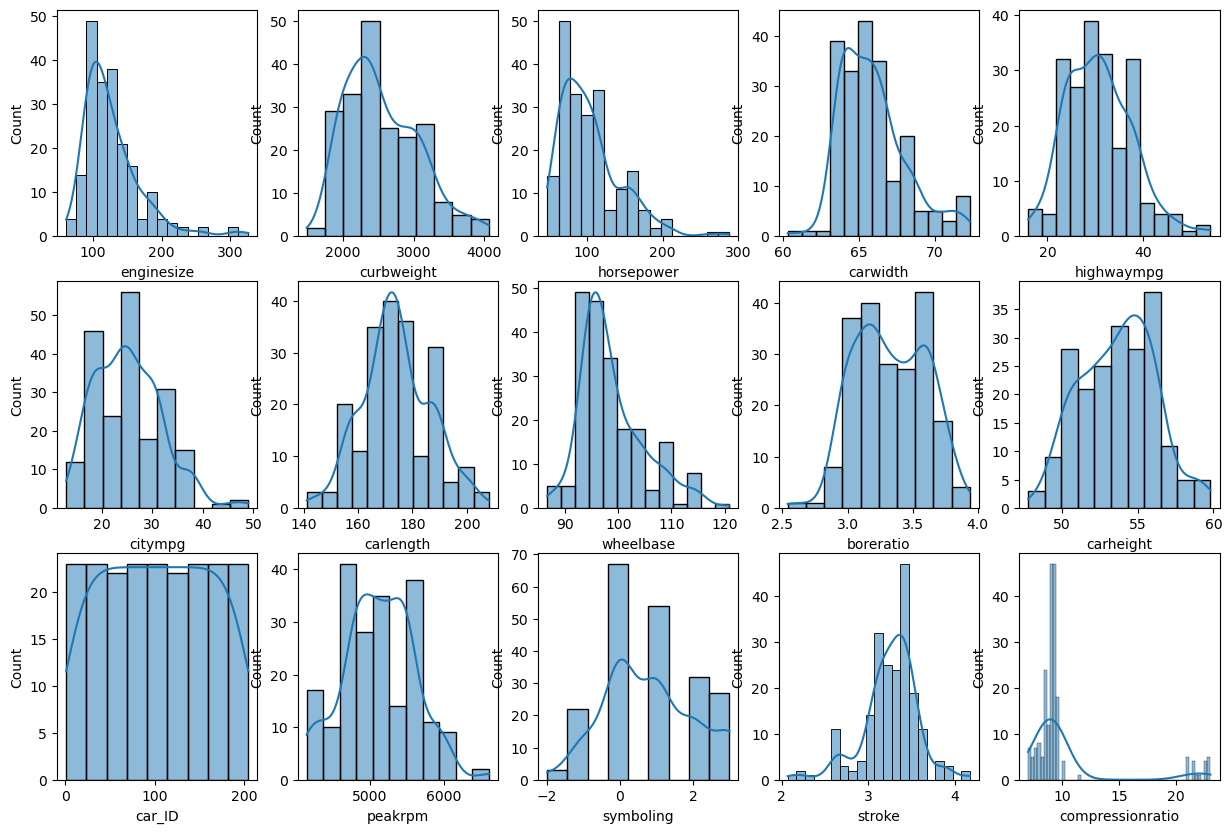

In [30]:
fig, axes = plt.subplots(3,5,figsize=(15,10))
axes = axes.flatten()

for f,i in enumerate(significant_features):
    sns.histplot(kde=True, x=df[i], ax=axes[f])

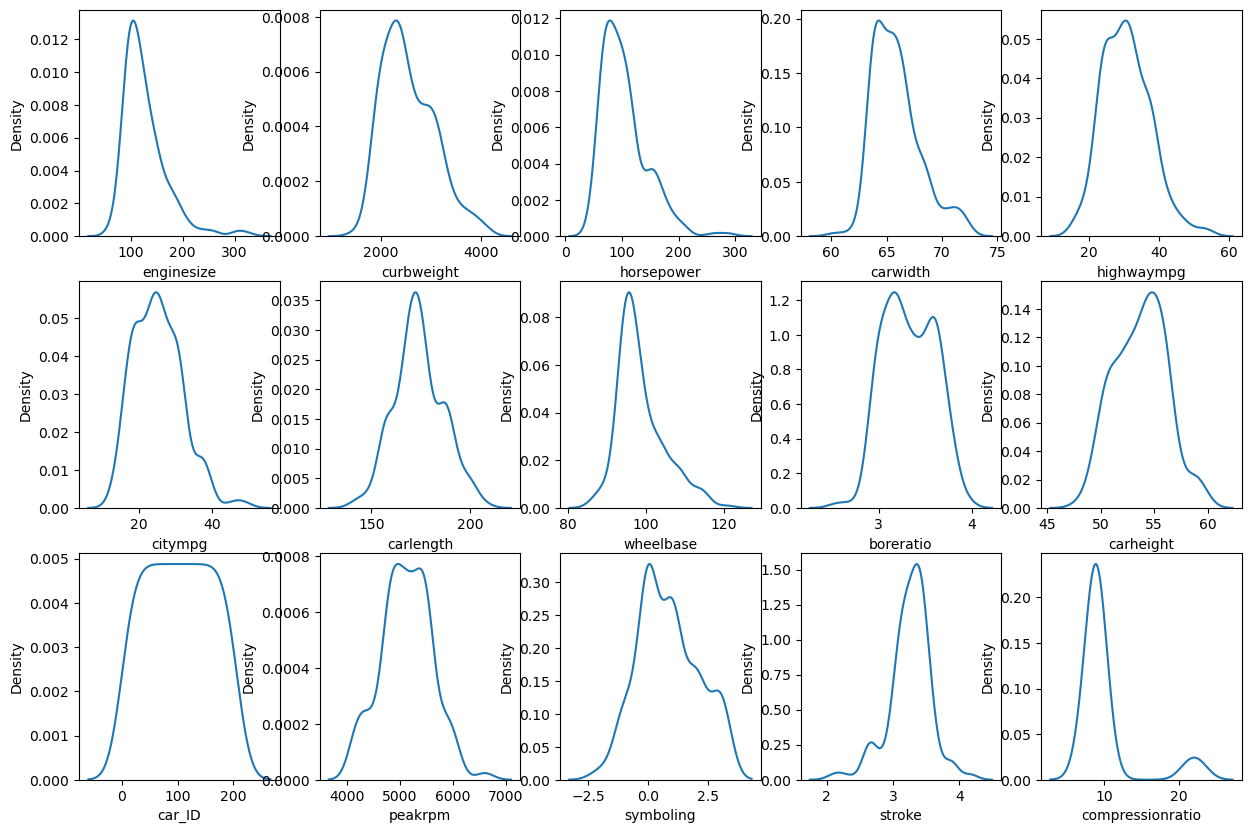

In [31]:
fig, axes = plt.subplots(3,5,figsize=(15,10))
axes = axes.flatten()

for f,i in enumerate(significant_features):
    sns.kdeplot( x=df[i], ax=axes[f])

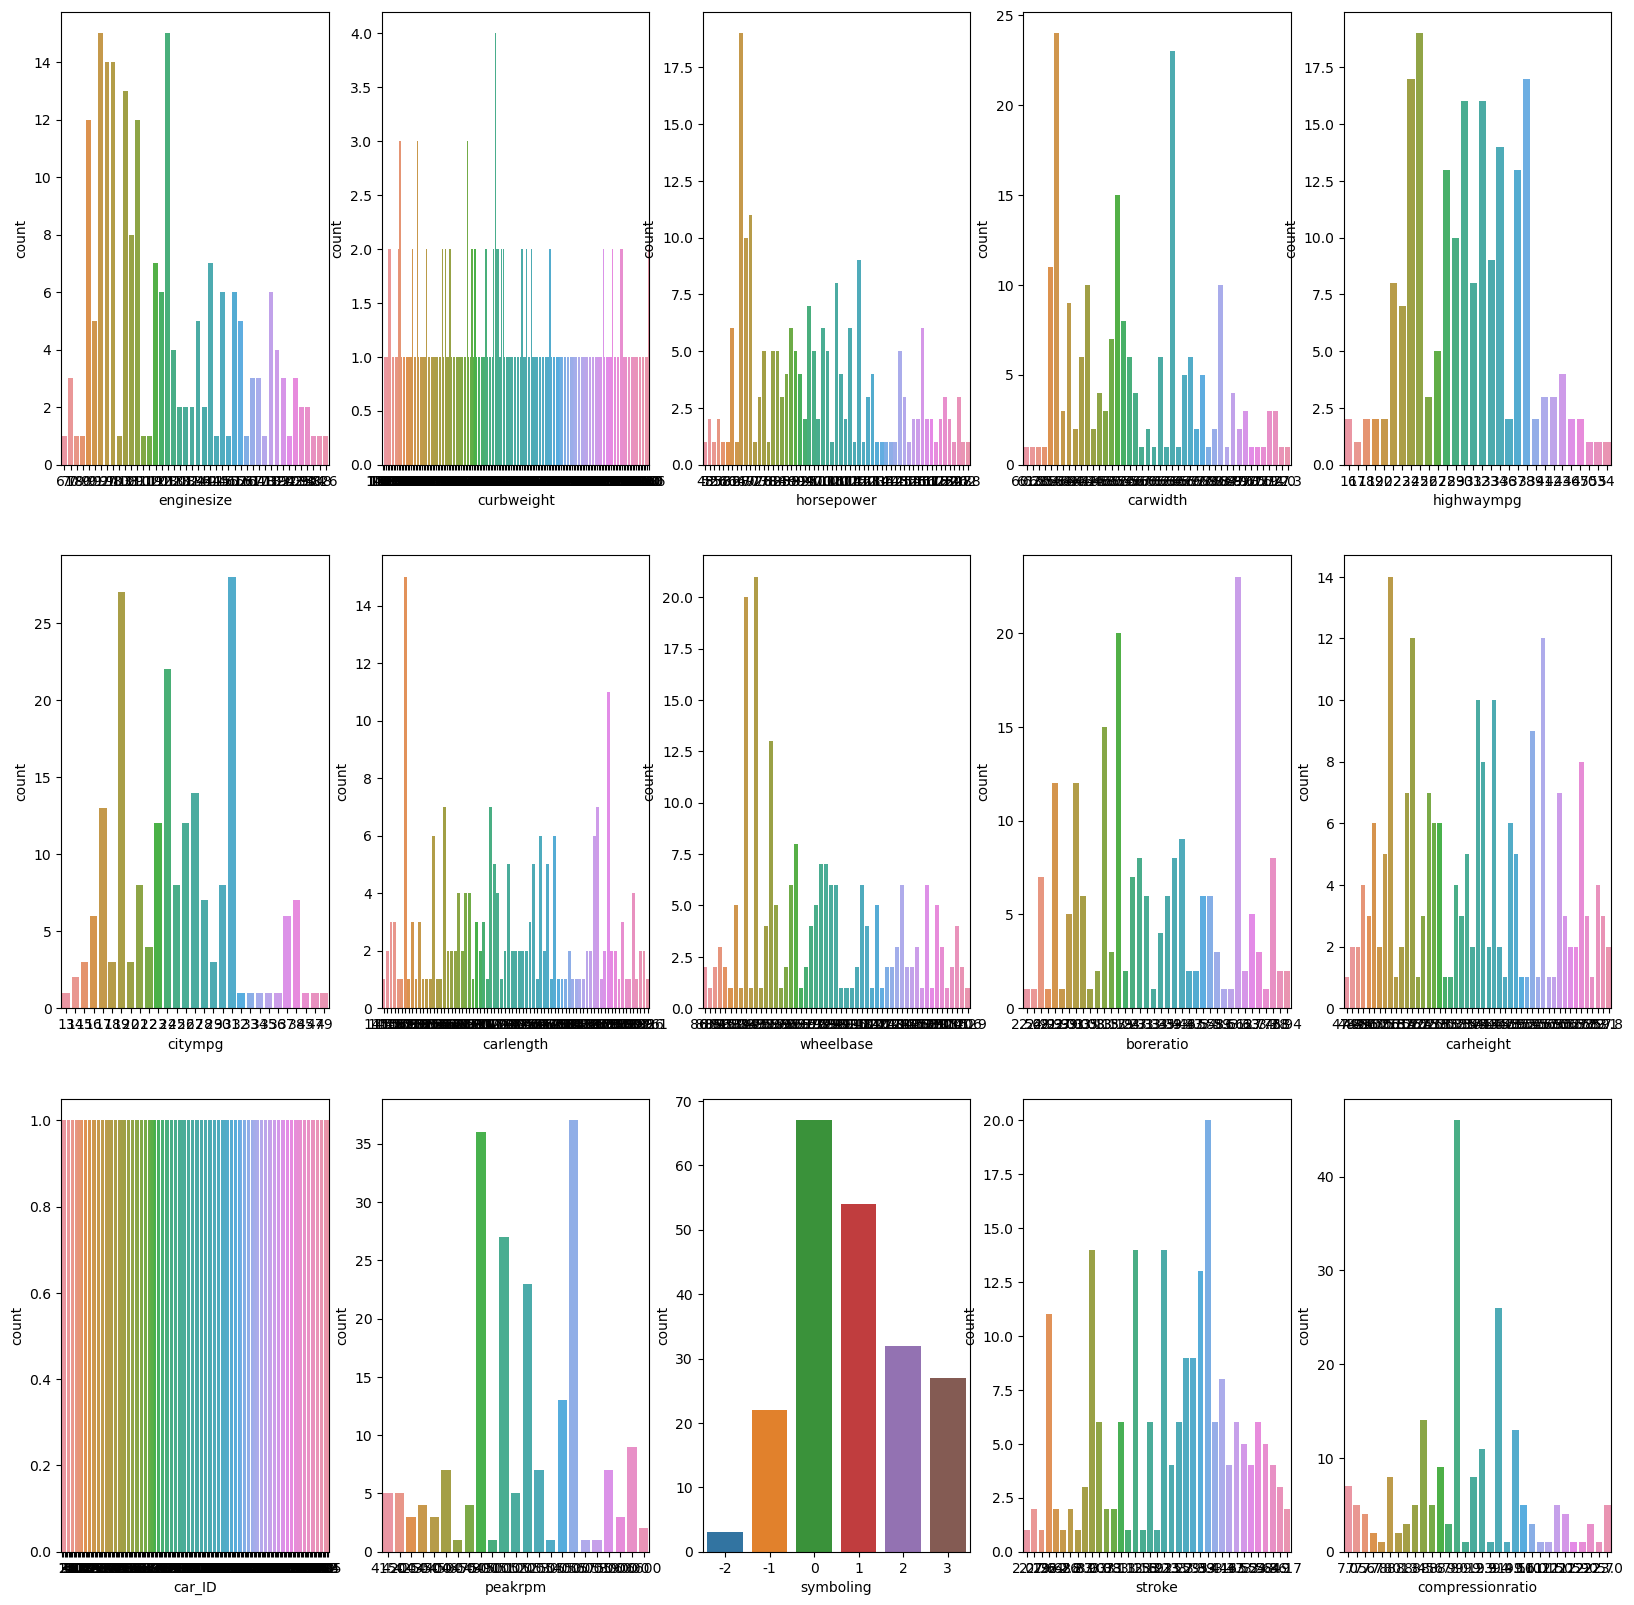

In [38]:
fig, axes = plt.subplots(3,5,figsize=(20,20))
axes = axes.flatten()
for f,i in enumerate(significant_features):
    sns.countplot( x=df[i], ax=axes[f])

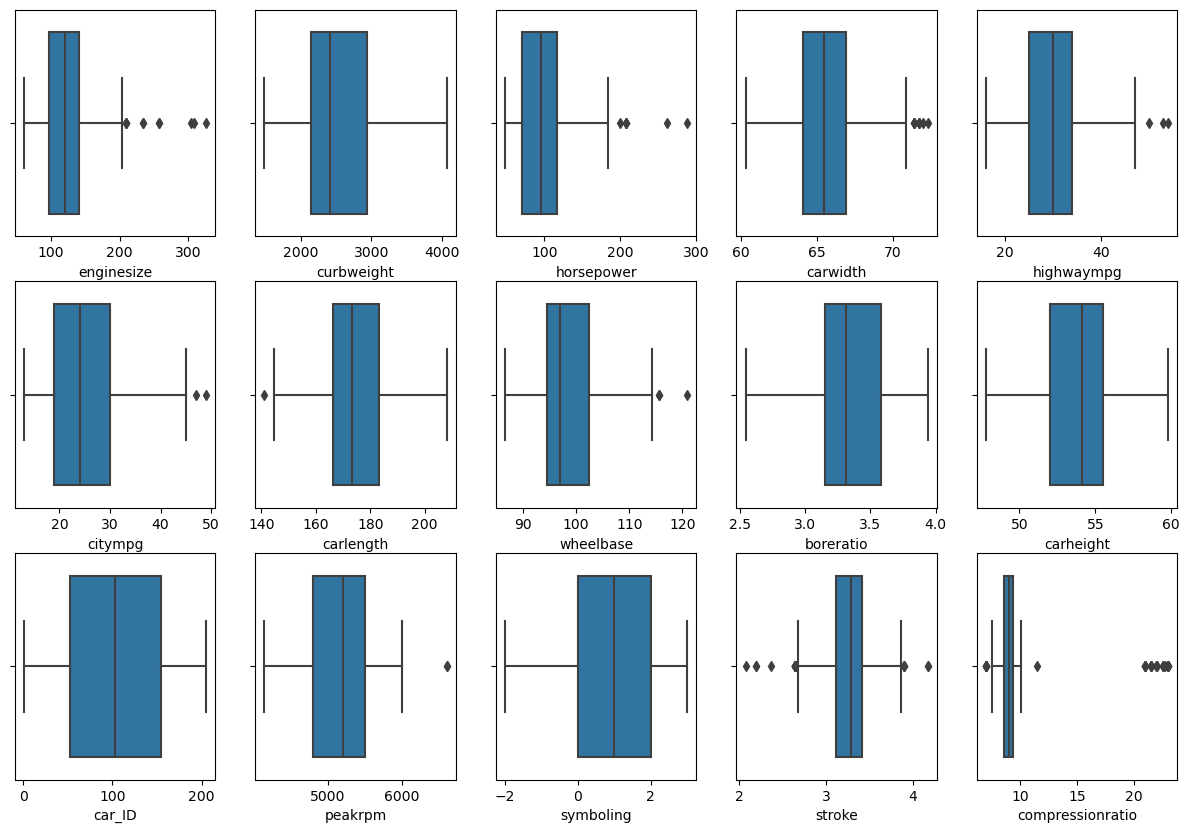

In [34]:
fig, axes = plt.subplots(3,5,figsize=(15,10))
axes = axes.flatten()

for f,i in enumerate(significant_features):
    sns.boxplot( x=df[i], ax=axes[f])

<Axes: xlabel='carlength', ylabel='enginesize'>

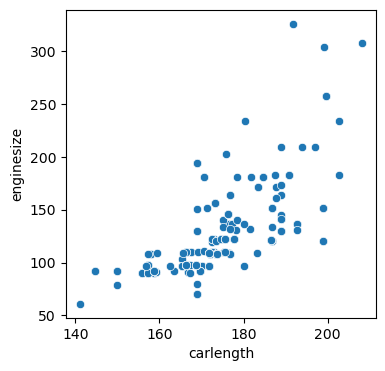

In [42]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="carlength",y="enginesize")

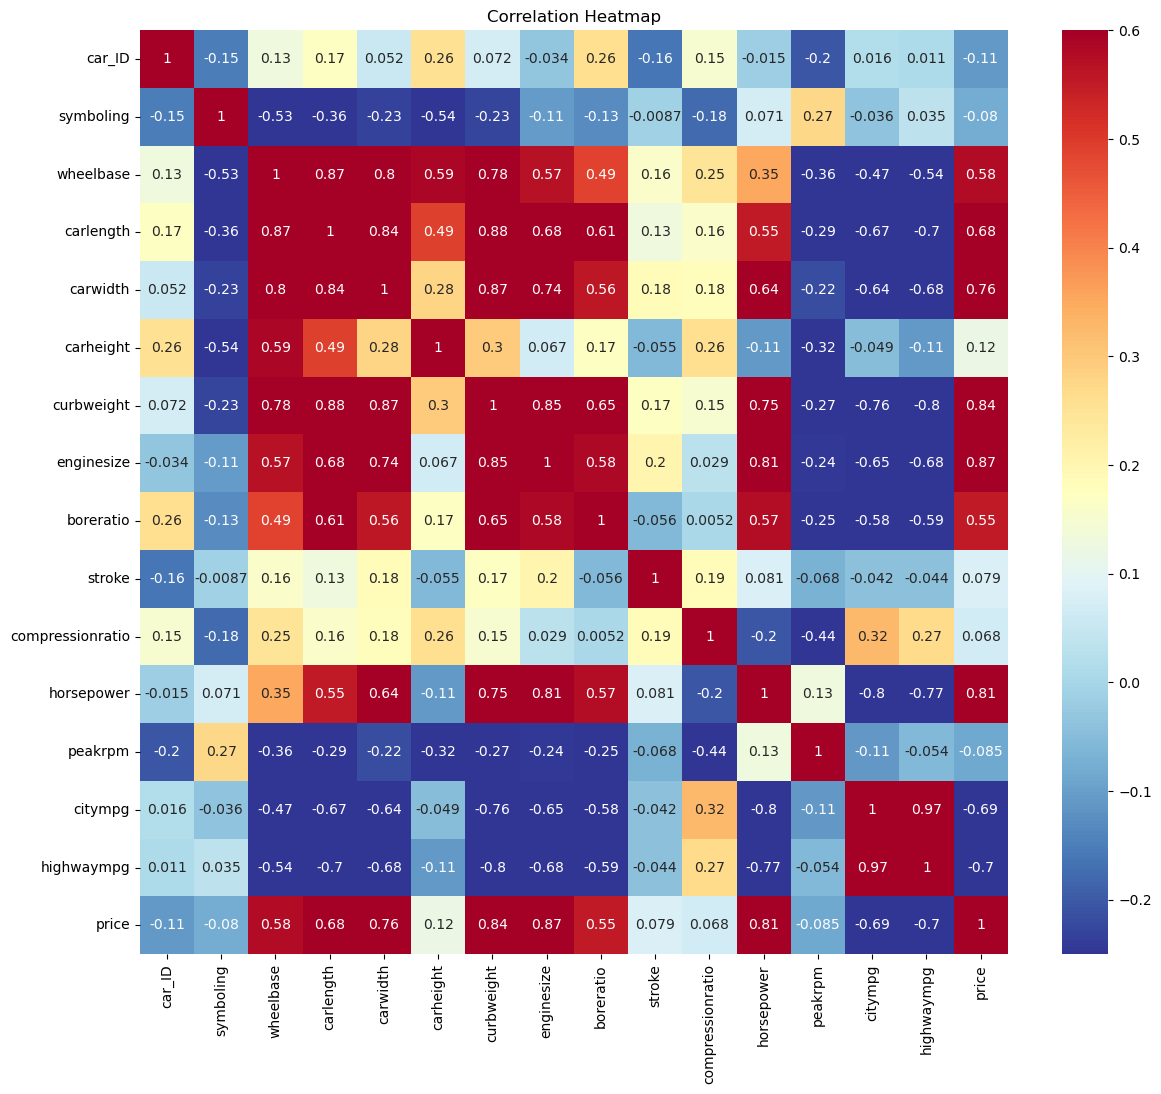

In [44]:
correlations = df.corr()
plt.figure(figsize = (14, 12))
sns.heatmap(correlations,cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');


<Axes: >

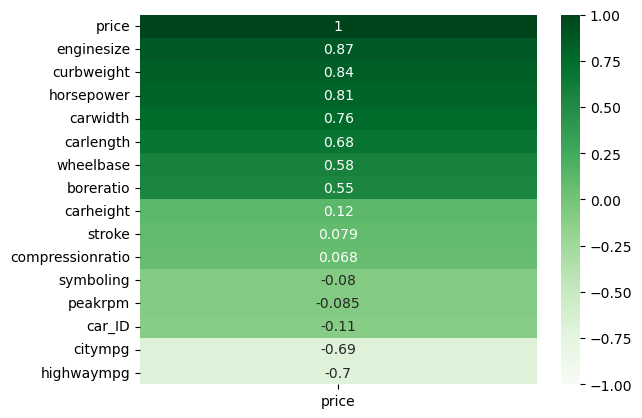

In [46]:
#check the correlation of all features with dependent variable using heatmap.
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False),vmin=-1,vmax=1,annot=True,cmap="Greens")

In [47]:
df.drop(["stroke","compressionratio","peakrpm","car_ID"],axis=1,inplace=True)

In [48]:
df.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [51]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,104.117073,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,39.544167,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,48.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,70.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,95.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,116.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,288.000000,49.000000,54.000000,45400.000000


In [49]:
x=df.drop("price",axis=1)
y=df.price

In [50]:
#Scaling 
from sklearn.preprocessing import StandardScaler

In [52]:
cat_features = ["CarName","fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation"
                ,"enginetype","cylindernumber","fuelsystem"]
num_features = ["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio","horsepower","citympg","highwaympg"]

In [53]:
def standerdisation(df,num_cols):
# copy of datasets
    df_stand = df.copy()

    # apply standardization on numerical features
    
    for i in num_cols:

        # fit on training data column
        scale = StandardScaler().fit(df_stand[[i]])

        # transform the training data column
        df_stand[i] = scale.transform(df_stand[[i]])
        
    return df_stand

In [54]:
x_std =  standerdisation(x,num_features)

In [55]:
x_std.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,1.743470,alfa-romero giulia,gas,std,two,convertible,rwd,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,0.174483,-0.646553,-0.546059
1,1.743470,alfa-romero stelvio,gas,std,two,convertible,rwd,front,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,dohc,four,0.074449,mpfi,0.519071,0.174483,-0.646553,-0.546059
2,0.133509,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,ohcv,six,0.604046,mpfi,-2.404880,1.264536,-0.953012,-0.691627
3,0.938490,audi 100 ls,gas,std,four,sedan,fwd,front,0.173698,0.207256,0.136542,0.235942,-0.420797,ohc,four,-0.431076,mpfi,-0.517266,-0.053668,-0.186865,-0.109354
4,0.938490,audi 100ls,gas,std,four,sedan,4wd,front,0.107110,0.207256,0.230001,0.235942,0.516807,ohc,five,0.218885,mpfi,-0.517266,0.275883,-1.106241,-1.273900


In [56]:
#label Encoding
from sklearn.preprocessing import LabelEncoder

In [57]:
def encoding(df,cat_cols):
# copy of datasets
    df_en = df.copy()

    # apply standardization on numerical features
    
    for i in cat_cols:

        # fit on training data column
        encoder =LabelEncoder().fit(df_en[[i]])

        # transform the training data column
        df_en[i] = encoder.transform(df_en[[i]])
        
    return df_en

In [58]:
x_final =encoding(x_std,cat_features)

In [59]:
x_final.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg
0,1.743470,2,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,0.174483,-0.646553,-0.546059
1,1.743470,3,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0,2,0.074449,5,0.519071,0.174483,-0.646553,-0.546059
2,0.133509,1,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,5,3,0.604046,5,-2.404880,1.264536,-0.953012,-0.691627
3,0.938490,4,1,0,0,3,1,0,0.173698,0.207256,0.136542,0.235942,-0.420797,3,2,-0.431076,5,-0.517266,-0.053668,-0.186865,-0.109354
4,0.938490,5,1,0,0,3,0,0,0.107110,0.207256,0.230001,0.235942,0.516807,3,1,0.218885,5,-0.517266,0.275883,-1.106241,-1.273900


In [60]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [61]:
#model Building
models = {
 "LinearRegression": LinearRegression(),
 "Ridge":Ridge(),
 "LinearSVR":LinearSVR(),
 "DecisionTreeRegressor":DecisionTreeRegressor(),
 "GradientBoostingRegressor":GradientBoostingRegressor(),
 "AdaBoostRegressor":AdaBoostRegressor(),
 "RandomForestRegressor":RandomForestRegressor()}

In [62]:
#Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [64]:
for name, model in models.items():
 scores = cross_val_score(model, x_final,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
 print("cross validation model : {}".format(name))
 rmse = np.sqrt(-scores)
 rmse_average = np.mean(rmse)
 print("AVERAGE RMSE: ",rmse_average)
 print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4464.26865172077
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  4336.9118074823755
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  8491.003897032797
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  3367.3543585797743
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  2711.91676091126
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  2881.544219391372
************************************************

In [65]:
#Splitting Data into Train & Test
x_train,x_test,y_train,y_test=train_test_split(x_final,y,test_size=0.2,random_state=0)

In [69]:
#Final model 
model = GradientBoostingRegressor()
model.fit(x_train, y_train)
RandomForestRegressor()
y_pred = model.predict(x_final)
result = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"),dtype=float)
result.head()

,ACTUAL,PREDICTION
0,13495.0,13995.969084
1,16500.0,15937.122717
2,16500.0,16556.548199
3,13950.0,14398.539336
4,17450.0,17287.350496


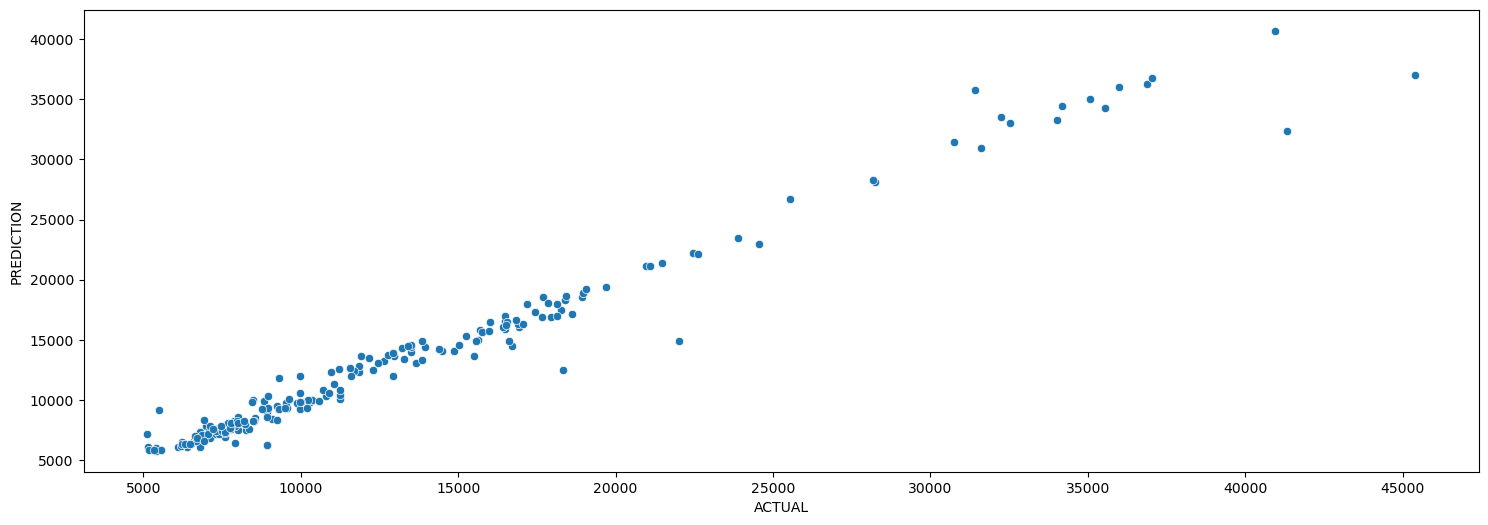

In [70]:
plt.figure(figsize=(18,6))
sns.scatterplot(x='ACTUAL', y='PREDICTION', data=result);

In [71]:
# model accuracy
model.score(x_final,y)

0.9707233452057137